# Is Ja Morant Better Than Prime Derrick Rose?

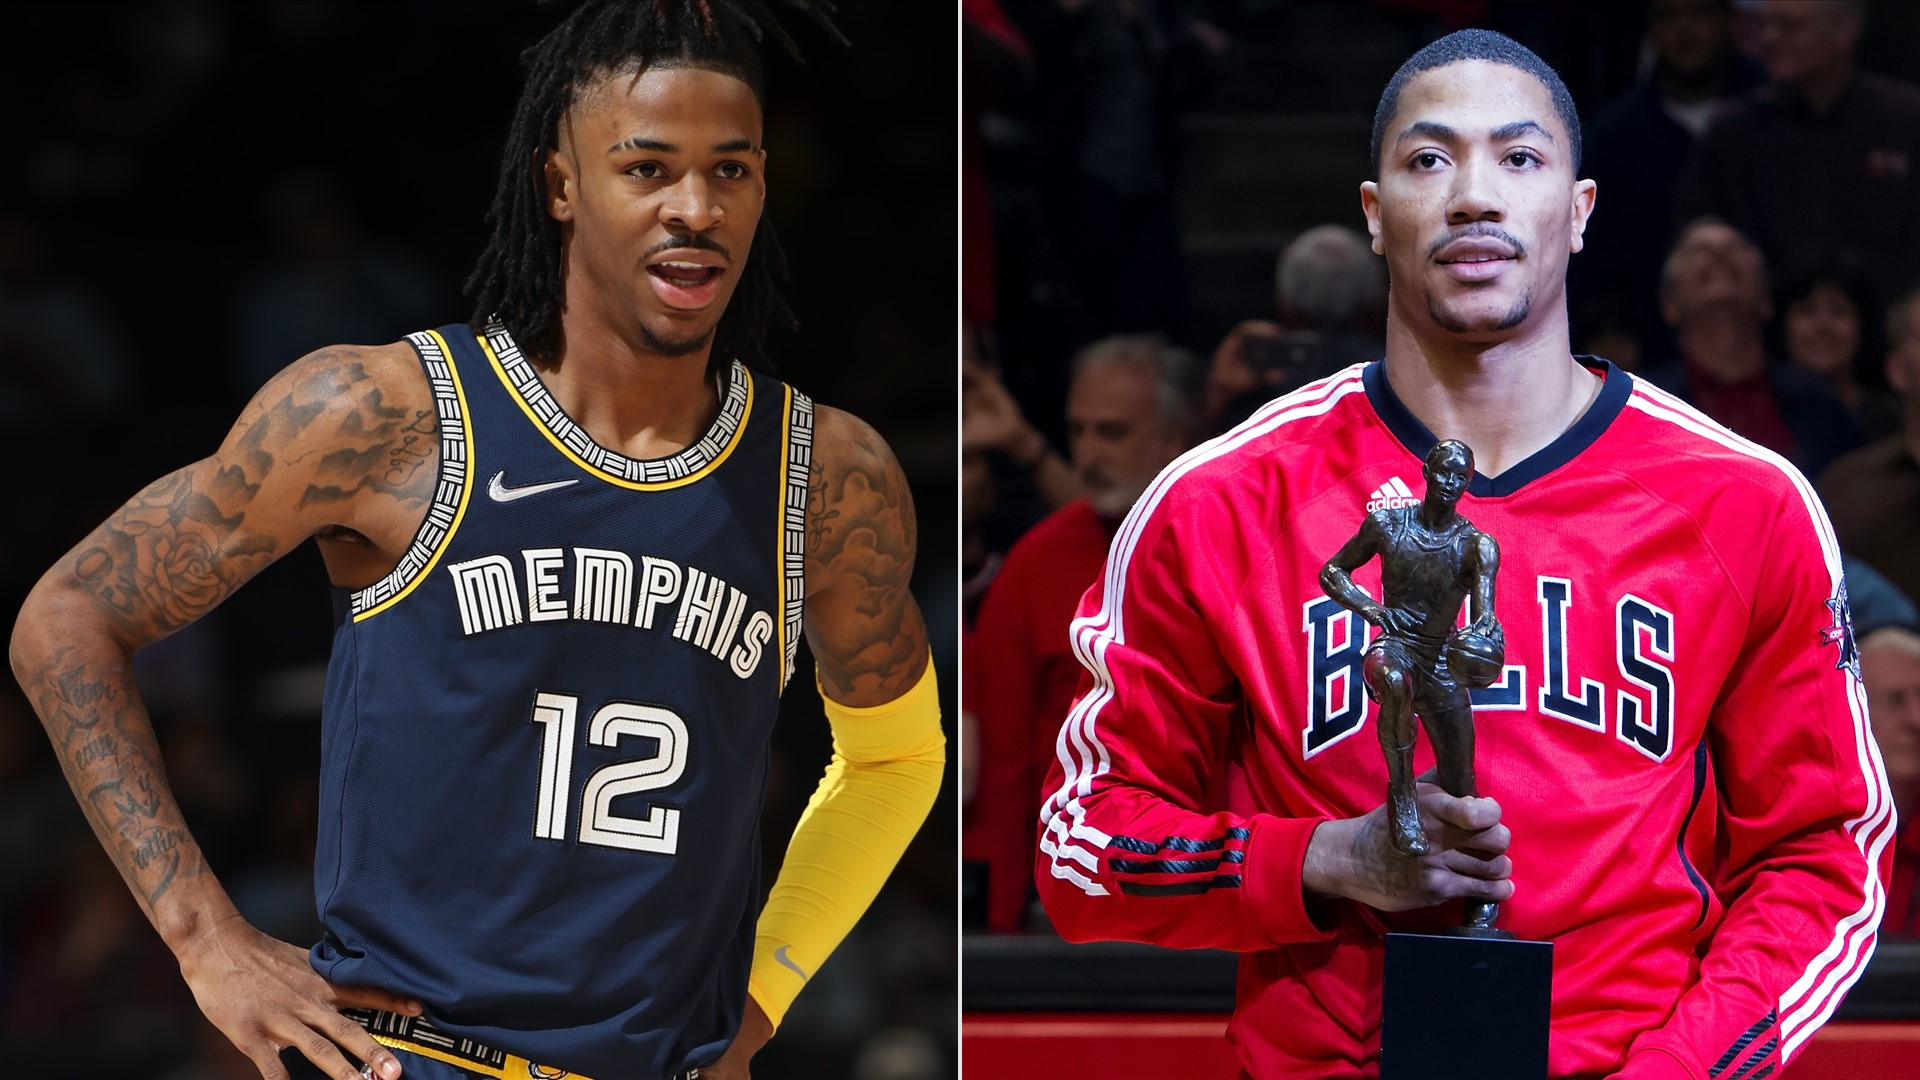

With Ja Morant having a stellar third season in the league, it's no debate that this point guard has lived up to the hype as the No. 2 overall draft pick in the 2019 NBA draft. However, after setting franchise records in back to back games, the Memphis point guard is being compared to the likes of another high-calibre guard, Derrick Rose.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from nba_api.stats.static import players
from nba_api.stats.static import teams
from nba_api.stats.endpoints import playergamelog
from nba_api.stats.library.parameters import SeasonAll
from nba_api.stats.endpoints import leaguegamefinder

In [2]:
players = players.get_players()

In [3]:
morant = [player for player in players if player['full_name'] == 'Ja Morant'][0]

In [4]:
morant

{'id': 1629630,
 'full_name': 'Ja Morant',
 'first_name': 'Ja',
 'last_name': 'Morant',
 'is_active': True}

In [5]:
rose = [player for player in players if player['full_name'] == 'Derrick Rose'][0]

In [6]:
rose

{'id': 201565,
 'full_name': 'Derrick Rose',
 'first_name': 'Derrick',
 'last_name': 'Rose',
 'is_active': True}

In [7]:
def filter_data(df):
    if 'GAME_DATE' in df:
        df['GAME_DATE'] = pd.to_datetime(df['GAME_DATE'])
    if 'SEASON_ID' in df:    
        df.drop('SEASON_ID', axis = 1, inplace = True)
    if 'Player_ID' in df:
        df.drop('Player_ID', axis = 1, inplace = True)
    if 'Game_ID' in df:
        df.drop('Game_ID', axis = 1, inplace = True)
    if 'VIDEO_AVAILABLE' in df:
        df.drop('VIDEO_AVAILABLE', axis = 1, inplace = True)
    if 'GAME_DATE' in df:
        df.sort_values(by='GAME_DATE', inplace=True)
    df.reset_index(inplace = True)
    df.drop('index', axis = 1, inplace = True)
    if 'level_0' in df:
        df.drop('level_0', axis = 1, inplace = True)

In [8]:
mvp_morant = playergamelog.PlayerGameLog(player_id = morant['id'], season = 2021).get_data_frames()[0]

In [9]:
mvp_rose = playergamelog.PlayerGameLog(player_id = rose['id'], season = 2010).get_data_frames()[0].head(len(mvp_morant))

In [10]:
rookie_morant = playergamelog.PlayerGameLog(player_id = morant['id'], season = 2019).get_data_frames()[0]

In [11]:
rookie_rose = playergamelog.PlayerGameLog(player_id = rose['id'], season = 2008).get_data_frames()[0]

In [12]:
sophomore_morant = playergamelog.PlayerGameLog(player_id = morant['id'], season = 2020).get_data_frames()[0]

In [13]:
sophomore_rose = playergamelog.PlayerGameLog(player_id = rose['id'], season = 2009).get_data_frames()[0]

In [14]:
morant_stats = pd.concat([rookie_morant, sophomore_morant, mvp_morant])
rose_stats = pd.concat([rookie_rose, sophomore_rose, mvp_rose])

In [15]:
rookie_morant['Player'] = 'Ja Morant'
rookie_morant['Team'] = 'Memphis Grizzlies'
sophomore_morant['Player'] = 'Ja Morant'
sophomore_morant['Team'] = 'Memphis Grizzlies'
mvp_morant['Player'] = 'Ja Morant'
mvp_morant['Team'] = 'Memphis Grizzlies'

rookie_rose['Player'] = 'Derrick Rose'
rookie_rose['Team'] = 'Chicago Bulls'
sophomore_rose['Player'] = 'Derrick Rose'
sophomore_rose['Team'] = 'Chicago Bulls'
mvp_rose['Player'] = 'Derrick Rose'
mvp_rose['Team'] = 'Chicago Bulls'

In [16]:
rookie = pd.concat([rookie_rose, rookie_morant])
sophomore = pd.concat([sophomore_rose, sophomore_morant])
mvp = pd.concat([mvp_rose, mvp_morant])

In [17]:
rookie_stats = [rookie_rose, rookie_morant]
sophomore_stats = [sophomore_rose, sophomore_morant]
mvp_stats = [mvp_rose, mvp_morant]

In [18]:
stats = [rookie_rose, sophomore_rose, mvp_rose, rose_stats, rookie_morant, sophomore_morant, mvp_morant, morant_stats, rookie, sophomore, mvp]

In [19]:
for i in stats:
    filter_data(i)

In [20]:
rookie.columns

Index(['GAME_DATE', 'MATCHUP', 'WL', 'MIN', 'FGM', 'FGA', 'FG_PCT', 'FG3M',
       'FG3A', 'FG3_PCT', 'FTM', 'FTA', 'FT_PCT', 'OREB', 'DREB', 'REB', 'AST',
       'STL', 'BLK', 'TOV', 'PF', 'PTS', 'PLUS_MINUS', 'Player', 'Team'],
      dtype='object')

Now that we've filtered the data, it's time to get into the nitty-gritty and dive into their respective stats to compare these two guards. Let's start from the very beginnning and analayze each of the respective players' rookie years. To do this, we'll compare the following categories of statistics:

* PTS
* REB
* ASSISTS
* STEALS
* FG_PCT
* FT_PCT
* TOV
* PLUS_MINUS
* WL

In [21]:
def plot_data(df):    
    fig, axes = plt.subplots(4, 2, figsize = (16, 24))
    axes = axes.flatten()
    sns.barplot(ax = axes[0], x = 'Player', y = 'PTS', data = df, capsize = .1, palette={"Derrick Rose": "red", "Ja Morant": "blue"})
    axes[0].set_title("Points")
    sns.barplot(ax = axes[1], x = 'Player', y = 'AST', data = df, capsize = .1, palette={"Derrick Rose": "red", "Ja Morant": "blue"})
    axes[1].set_title("Assists")
    sns.barplot(ax = axes[2], x = 'Player', y = 'REB', data = df, capsize = .1, palette={"Derrick Rose": "red", "Ja Morant": "blue"})
    axes[2].set_title("Rebounds")
    sns.barplot(ax = axes[3], x = 'Player', y = 'STL', data = df, capsize = .1, palette={"Derrick Rose": "red", "Ja Morant": "blue"})
    axes[3].set_title("Steals")
    sns.barplot(ax = axes[4], x = 'Player', y = 'FG_PCT', data = df, capsize = .1, palette={"Derrick Rose": "red", "Ja Morant": "blue"})
    axes[4].set_title("Field Goal Percentage")
    sns.barplot(ax = axes[5], x = 'Player', y = 'FT_PCT', data = df, capsize = .1, palette={"Derrick Rose": "red", "Ja Morant": "blue"})
    axes[5].set_title("Free Throw Percentage")
    sns.barplot(ax = axes[6], x = 'Player', y = 'TOV', data = df, capsize = .1, palette={"Derrick Rose": "red", "Ja Morant": "blue"})
    axes[6].set_title("Turnovers")
    sns.barplot(ax = axes[7], x = 'Player', y = 'PLUS_MINUS', data = df, capsize = .1, palette={"Derrick Rose": "red", "Ja Morant": "blue"})
    axes[7].set_title("Plus Minus")
    sns.despine()

## Rookie Year

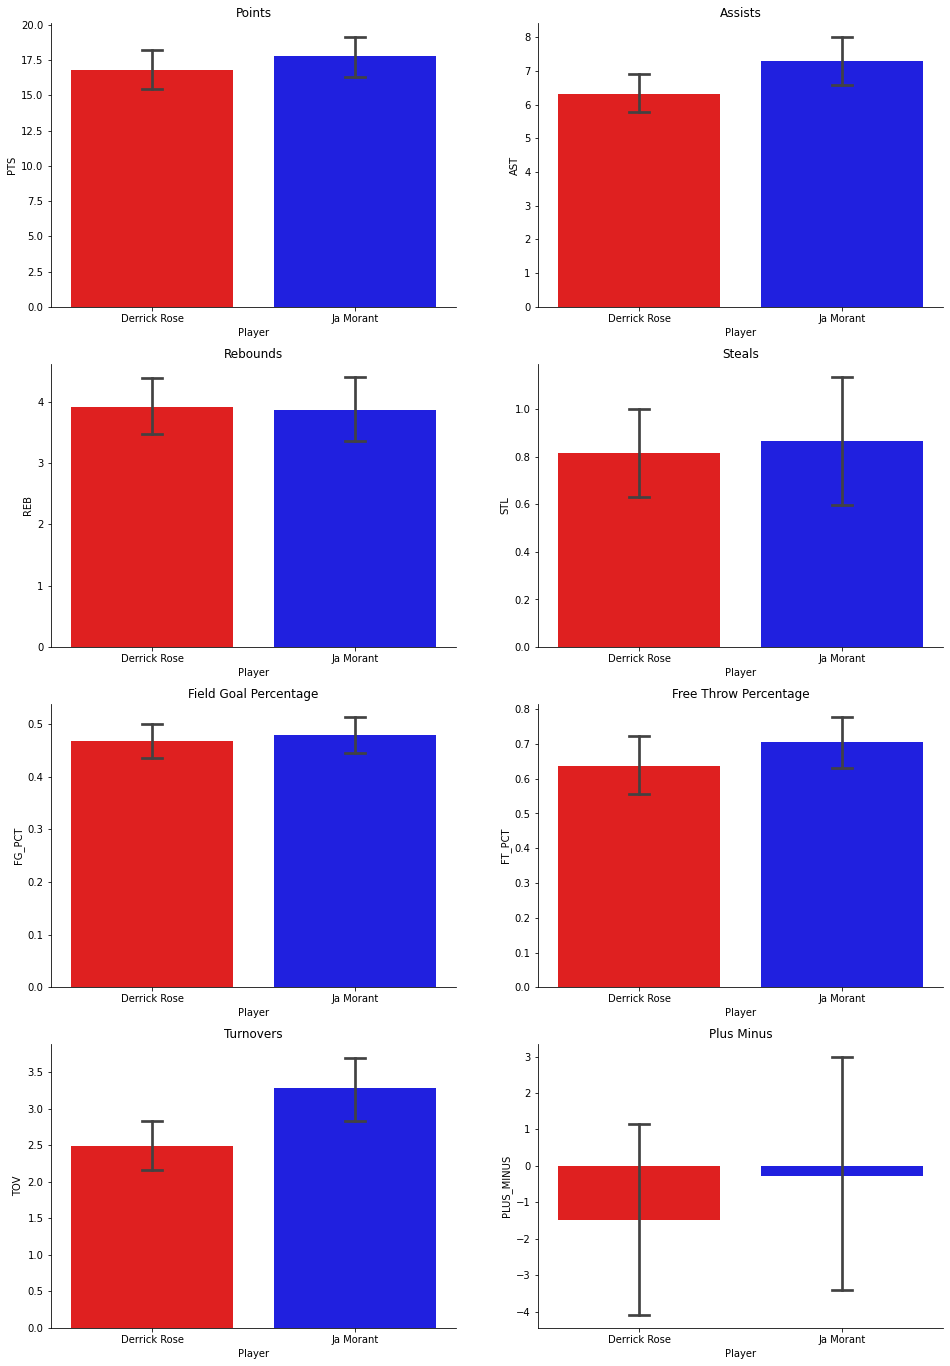

In [22]:
plot_data(rookie)

In [23]:
rookie_rose.mean(numeric_only = True)

MIN           37.037037
FGM            7.086420
FGA           14.913580
FG_PCT         0.466914
FG3M           0.197531
FG3A           0.888889
FG3_PCT        0.085593
FTM            2.432099
FTA            3.086420
FT_PCT         0.637185
OREB           1.185185
DREB           2.728395
REB            3.913580
AST            6.320988
STL            0.814815
BLK            0.222222
TOV            2.493827
PF             1.543210
PTS           16.802469
PLUS_MINUS    -1.493827
dtype: float64

In [24]:
rookie_morant.mean(numeric_only = True)

MIN           30.955224
FGM            6.671642
FGA           13.985075
FG_PCT         0.478284
FG3M           0.895522
FG3A           2.671642
FG3_PCT        0.294940
FTM            3.567164
FTA            4.597015
FT_PCT         0.704627
OREB           0.761194
DREB           3.104478
REB            3.865672
AST            7.283582
STL            0.865672
BLK            0.268657
TOV            3.283582
PF             1.641791
PTS           17.805970
PLUS_MINUS    -0.283582
dtype: float64

During their first season, it wasn't long before Derrick Rose and Ja Morant became accustomed to the league. Being the first and second overall picks in their respective NBA drafts, there was an immense amount of pressure put on these two prodigies to perform on the national stage. Like diamonds built under pressure, these two point guards rose to fame for their ability to attack the paint combined with their tremendous athleticism. Eventually, they were awarded Rookie of the Year... but who was the better rookie? While Rose played approximately 6 more minutes than Morant, the two shared many similar stats, with Ja taking the edge most of the time. Compaing points per game, Ja averaged approximately 17.8 points per game while Rose averaged 16.8 points per game. Being a guard, passing the rock is crucial. Looking at the two guards' assists, Rose averaged 6.3 assists per game while Ja averaged 7.3. After looking at the charts, its clear to see that Ja reigns supreme by a minor margin in all of the major stats except rebounding. Regardless, the difference between the two is so minor that it's not enough to say that Morant is the better player. Nevertheless, there's a key factor that we are not taking into consideration that should be touched on; the teams's performance. After all, basketball is a team sport. While this shouldn't be a deciding factor to decide who is better, it is important to consider it.

In [25]:
def win_loss_ratio(df):
    return (df['WL'].value_counts().W / df['WL'].value_counts().L)

In [26]:
def plot_win_loss(df):
    fig, axes = plt.subplots(1, 2, figsize = (16, 6))
    sns.countplot(ax = axes[0], x = 'WL', data = df[0], palette={"W": "green", "L": "red"})
    axes[0].set_ylim(0, 50)
    axes[0].set_title("Chicago Bulls")
    sns.countplot(ax = axes[1], x = 'WL', data = df[1], palette={"W": "green", "L": "red"})
    axes[1].set_ylim(0, 50)
    axes[1].set_title("Memphis Grizzlies")

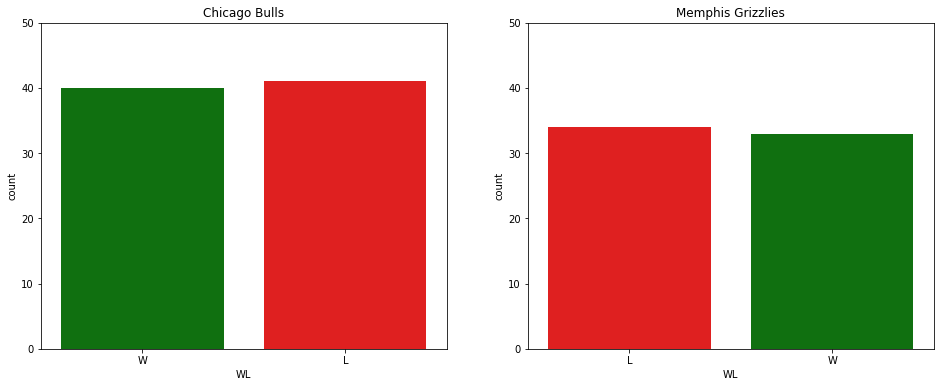

In [27]:
plot_win_loss(rookie_stats)

In [28]:
win_loss_ratio(rookie_rose)

0.975609756097561

In [29]:
win_loss_ratio(rookie_morant)

0.9705882352941176

Surprisingly enough, both teams had a similar 0.97 win/loss ratio during that season when Rose/Morant played. However, an important thing to notice is that the 2008-2009 Bulls did make the NBA playoffs where they were defeated in the first round by the defending champions, the Boston Celtics. Meanwhile, the 2019-2020 Memphis Grizzlies were unable to make the playoffs. Regardless, both candidates were reward Rookie of the Year at the end of the season. It's easy to see that these two players were very close in statistics during their first year in the league. Let's now look at their second year.

## Sophomore Year

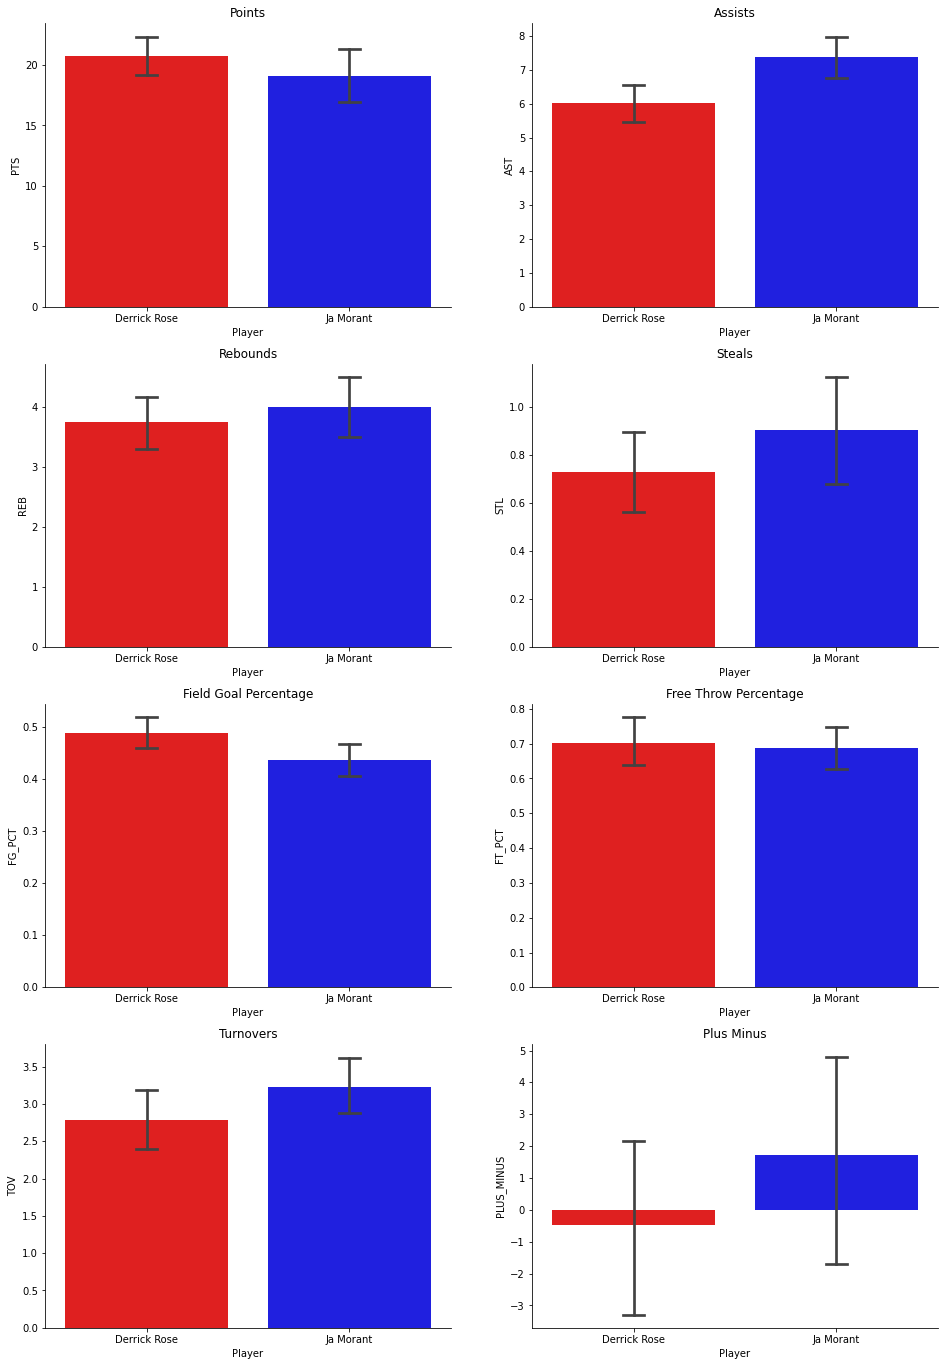

In [30]:
plot_data(sophomore)

In [31]:
sophomore_rose.mean(numeric_only = True)

MIN           36.833333
FGM            8.615385
FGA           17.602564
FG_PCT         0.490154
FG3M           0.205128
FG3A           0.769231
FG3_PCT        0.103026
FTM            3.320513
FTA            4.333333
FT_PCT         0.702641
OREB           0.833333
DREB           2.923077
REB            3.756410
AST            6.012821
STL            0.730769
BLK            0.346154
TOV            2.782051
PF             1.230769
PTS           20.756410
PLUS_MINUS    -0.487179
dtype: float64

In [32]:
sophomore_morant.mean(numeric_only = True)

MIN           32.619048
FGM            6.825397
FGA           15.190476
FG_PCT         0.438159
FG3M           1.158730
FG3A           3.825397
FG3_PCT        0.289143
FTM            4.301587
FTA            5.904762
FT_PCT         0.688254
OREB           0.936508
DREB           3.063492
REB            4.000000
AST            7.380952
STL            0.904762
BLK            0.206349
TOV            3.222222
PF             1.380952
PTS           19.111111
PLUS_MINUS     1.730159
dtype: float64

With their second season in the league, we can clearly see that these two guards have more disparity with their stats compared to their first season. While their points stay relatively similar to each other with Rose coming in with approximately 20.8 points per game and Morant at 19.1 points per game, many of their other stats seem to differ significantly. In his second season, the public could see Ja's comfortability with the ball aswell as his ability to pass it. Coming up with approximate 7.3 assists compared to Derrick's 6.0 assists per game, it was evident that Ja was a better passer. After all, as time passed, Ja was accredited for his court vision and his ability to pass the ball in troubling situations. However, with these risky passes came a greater turnover rate from Ja clocking in at 3.2 turnovers a game compared to Rose's 2.8. Aside from that, their stats are relatively similar to each other. However, one stat that does differ is their respective plus-minus. Plus-minus is an interesting stat that represents how well the team performs when the player is on the floor. According to this stat, Derrick Rose had an average plus-minus of approximately -0.5 (meaning the opposing team outscored the Chicago Bulls when Rose was on the floor). Meanwhile, Ja Morant had an average plus-minus of 1.7 (meaning the Memphis Grizzlies would outscore the opposing team when Ja Morant was on the floor). But let's see how the two teams performed during the duration of the season when both these players played

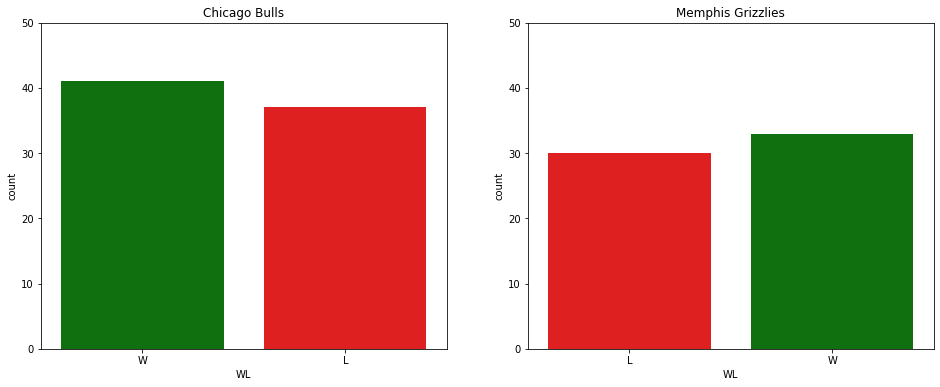

In [33]:
plot_win_loss(sophomore_stats)

In [34]:
win_loss_ratio(sophomore_rose)

1.1081081081081081

In [35]:
win_loss_ratio(sophomore_morant)

1.1

Crazy enough, both teams had a similar win/loss ratio again with both clocking in at around a 1.1 win/loss ratio. In fact, both players made the playoffs and lost in the first round. The Chicago Bulls lost to the Cleveland Cavaliers in a 5 game series where Rose averaged 26.8 points and 7.2 assists. Likewise, the Memphis Grizzles also lost in a 5 game series to the Utah Jazz where Morant scored a season high of 47 points and 7 assists in game 2. It's clear to see that these players (and even their respective teams) are very similar. But now, it brings us to the two most iconic seasons of these two players' careers; Derrick Rose's MVP season and Ja Morant's potential MVP season.

## MVP Year

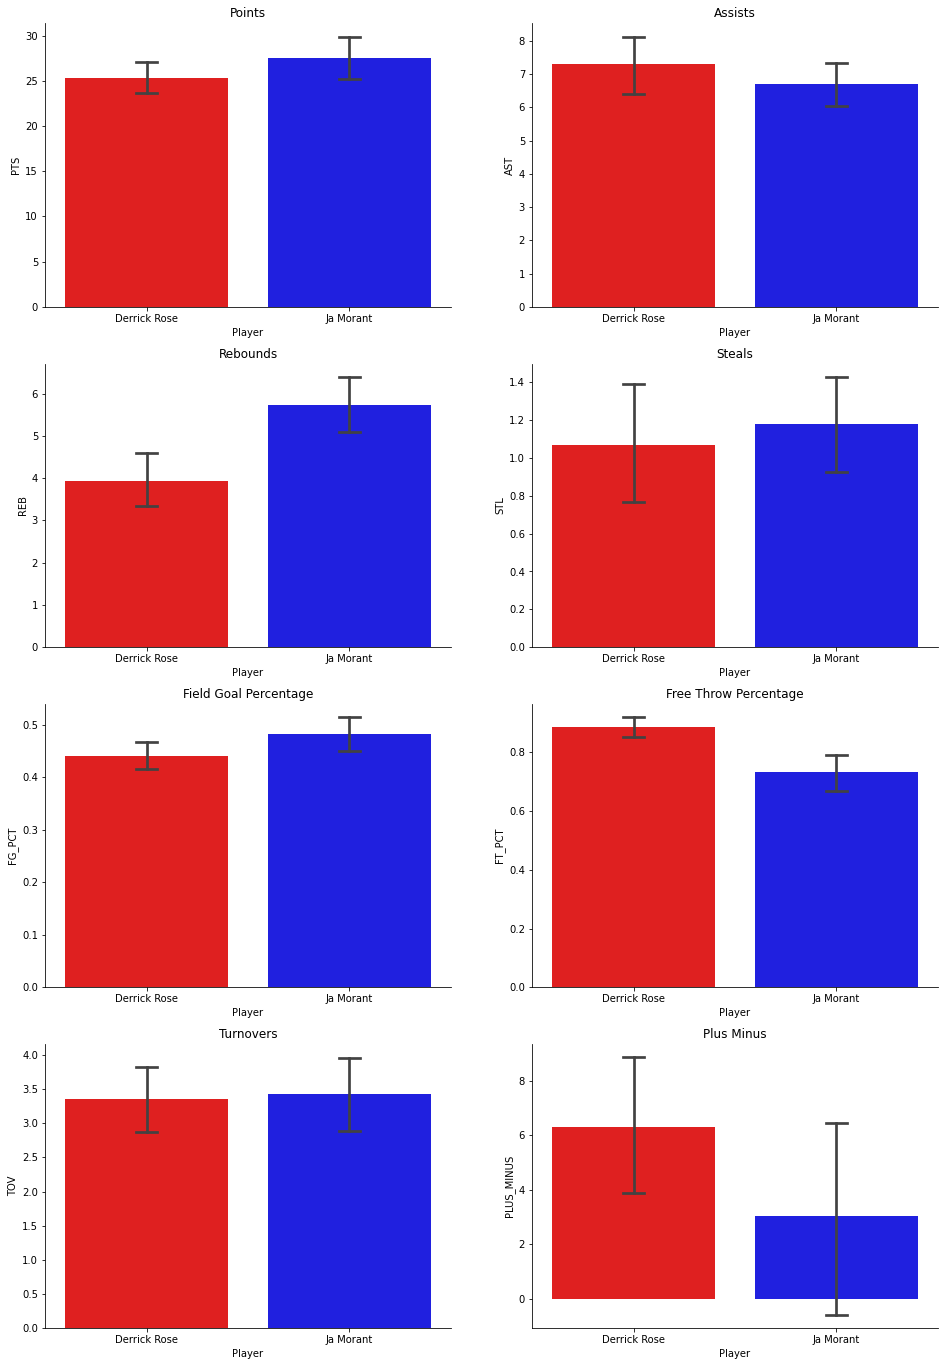

In [36]:
plot_data(mvp)

In [37]:
mvp_rose.mean(numeric_only = True)

MIN           37.196429
FGM            8.571429
FGA           19.589286
FG_PCT         0.439661
FG3M           1.482143
FG3A           4.964286
FG3_PCT        0.269429
FTM            6.732143
FTA            7.625000
FT_PCT         0.885589
OREB           1.000000
DREB           2.928571
REB            3.928571
AST            7.303571
STL            1.071429
BLK            0.660714
TOV            3.357143
PF             1.517857
PTS           25.357143
PLUS_MINUS     6.303571
dtype: float64

In [38]:
mvp_morant.mean(numeric_only = True)

MIN           33.339286
FGM           10.232143
FGA           20.767857
FG_PCT         0.482393
FG3M           1.535714
FG3A           4.517857
FG3_PCT        0.299214
FTM            5.553571
FTA            7.285714
FT_PCT         0.732161
OREB           1.339286
DREB           4.392857
REB            5.732143
AST            6.696429
STL            1.178571
BLK            0.375000
TOV            3.428571
PF             1.500000
PTS           27.553571
PLUS_MINUS     3.035714
dtype: float64

MVP Season. The season where these guards solidified their mark in NBA history. Putting up unreal numbers night after night, its no debate that these two guards are of top calibre. But the question is... who's better. When we start by analyzing their points, we begin to realize how hard this comparison is. With Derrick Rose averaging about 25.4 points per game and Ja Morant averaging about 27.6 points per game, it's no debate that these two guards are scoring machines. Both of them are able to attack the basket with ease with a field goal percentage of approximately 43% for Derrick Rose and 48% for Ja Morant. Nevertheless, Rose beats Ja at the line with a free throw percentage of approximately 89% compared to Ja's subpar 73%. On top of that, Rose beats Morant in his ability to pass the ball averaging about 7.3 assists per game compared to Ja's 6.7 assists per game. However, on the other side of the court, it seems Ja has Rose beat coming in with 5.7 rebounds a game (with 4.4 of them being defensive rebounds) and 1.1 steals a game compared to Rose's 3.9 rebounds a game. It seems that while Ja is a better defensive player, Rose is a better offensive player. With that being said, the debate takes a surprising turn when we analyze the two players' plus-minus. In his MVP season, Derrick Rose had an impressive 6.3 plus-minus compared to Ja Morant's 3.0 plus-minus. Not only did Rose double Ja's plus minus, but when we analyze how this stat affected the team's performance during the season, the answer to the debate becomes clear.

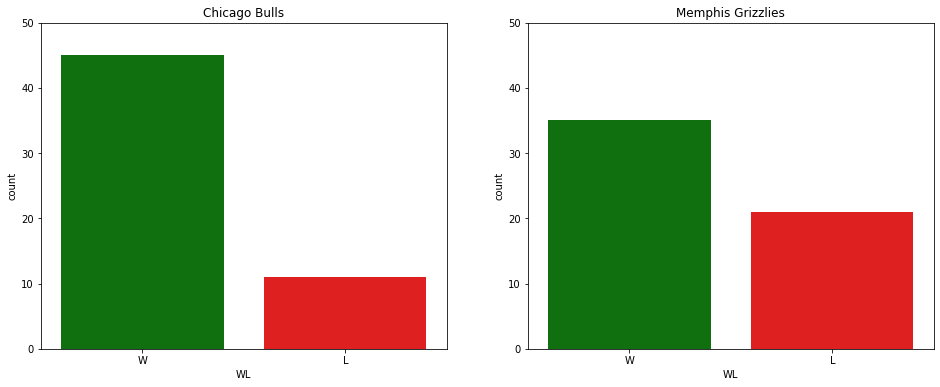

In [39]:
plot_win_loss(mvp_stats)

In [40]:
win_loss_ratio(mvp_rose)

4.090909090909091

In [41]:
win_loss_ratio(mvp_morant)

1.6666666666666667

Since the 2021-2022 season has not finished yet, we have only taken the first n games of Derrick Rose's 2010-11 season (where n represents the number of games Ja Morant has played in the 2021-22 season). With that assumption aside, it's clear to see how incredible this team is and we begin to understand why exactly Derrick Rose won MVP at such a young age. His plus-minus is not only remarkable for any 22 year old in the league, but helped the Chicago Bulls achieve a 4.1 win/loss ratio AND lead a subpar Bulls team to the conference finals. Until Ja Morant reaches a high level in the playoffs, I believe it is unfair to compare him to Derrick Rose's phenomenal MVP season. Without a doubt, Derrick's Rose's MVP season is one of a kind. But that's not to say Ja's isn't either. Ja's 2021-22 season hasn't come to a close just yet. Breaking records left and right, it's only fair to make this comparison after the season has ended. Until then, we'll just have to witness history unfold. 